In [1]:
from shapely.geometry import Point, GeometryCollection, MultiPolygon, Polygon
from model.RegionsCalcs import create_regions
from model.RegionsPlotter import standard_plot
import numpy as np
from model.NetworkGraph import CompleteGraph
from model.NodeClass import Node
from model.LinkClass import Link
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot
from numpy import random
import matplotlib.pyplot as plt

In [2]:
# Import the network
graph = CompleteGraph.of_sources("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [3]:
# Common scenario for both cases
# Params
scaling_factor = 1  # No scaling
p_tx_macro = 40     # W
p_tx_fem = 10       # W
alpha_loss = 4      # dB
def_max_rad = 0.5     # km
prob_fem = 1


cells = []
cells_max_radius = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL5":
        assocciated_nodes.append(node)


assocciated_nodes = sorted(assocciated_nodes, key=lambda x: x.type == "HL4", reverse=True)
for node in assocciated_nodes:
    if node.type == "HL4":
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_macro))
    else:
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_fem))
        cells_max_radius.append(def_max_rad)


base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

[(0.0, 0.0), (0.0, 35.57836559188485), (34.593073727138425, 35.57836559188485), (34.593073727138425, 0.0), (0.0, 0.0)]


# Case 1: Try with power-based radius

In [10]:

regions, _unsold = create_regions(
    np.array(cells),
    alpha_loss, 
    polygon_bounds=base_area,
    euclidean_to_km_scale=scaling_factor,
)

In [11]:
regions

{133: <POLYGON ((7.394 18.329, 7.389 18.231, 7.389 18.231, 7.375 18.134, 7.375 18....>,
 132: <POLYGON ((19.618 7.017, 19.625 7.011, 19.625 7.011, 19.691 6.938, 19.691 6....>,
 131: <POLYGON ((4.222 15.024, 4.222 15.024, 4.222 15.024, 4.222 15.024, 4.222 15....>,
 130: <POLYGON ((13.039 22.89, 13.039 22.89, 13.039 22.89, 13.039 22.89, 13.039 22...>,
 129: <POLYGON ((6.236 27.543, 6.233 27.529, 6.233 27.529, 6.21 27.434, 6.21 27.43...>,
 128: <POLYGON ((13.368 32.679, 13.368 32.679, 13.368 32.679, 13.368 32.679, 13.36...>,
 127: <POLYGON ((19.646 23.06, 19.646 23.06, 19.646 23.06, 19.646 23.06, 19.646 23...>,
 126: <POLYGON ((11.554 14.478, 11.554 14.477, 11.554 14.477, 11.587 14.385, 11.58...>,
 125: <POLYGON ((15.643 30.655, 15.589 30.606, 15.589 30.606, 15.51 30.548, 15.51 ...>,
 124: <POLYGON ((21.869 28.363, 21.835 28.368, 21.835 28.368, 21.739 28.392, 21.73...>,
 123: <POLYGON ((13.753 17.236, 13.714 17.153, 13.714 17.153, 13.663 17.069, 13.66...>,
 122: <POLYGON ((10.451 31.361, 

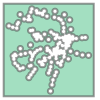

In [12]:
_unsold

In [18]:
area = Polygon(base_area)
print(f'Complete region area:{area.area}')
print(f'Uncovered area:{_unsold.area}')
print(f'Covered area:{area.area - _unsold.area} ({(area.area - _unsold.area) / area.area * 100:.2f}%)')

Complete region area:1230.7650240111575
Uncovered area:922.988144160848
Covered area:307.77687985030946 (25.01%)


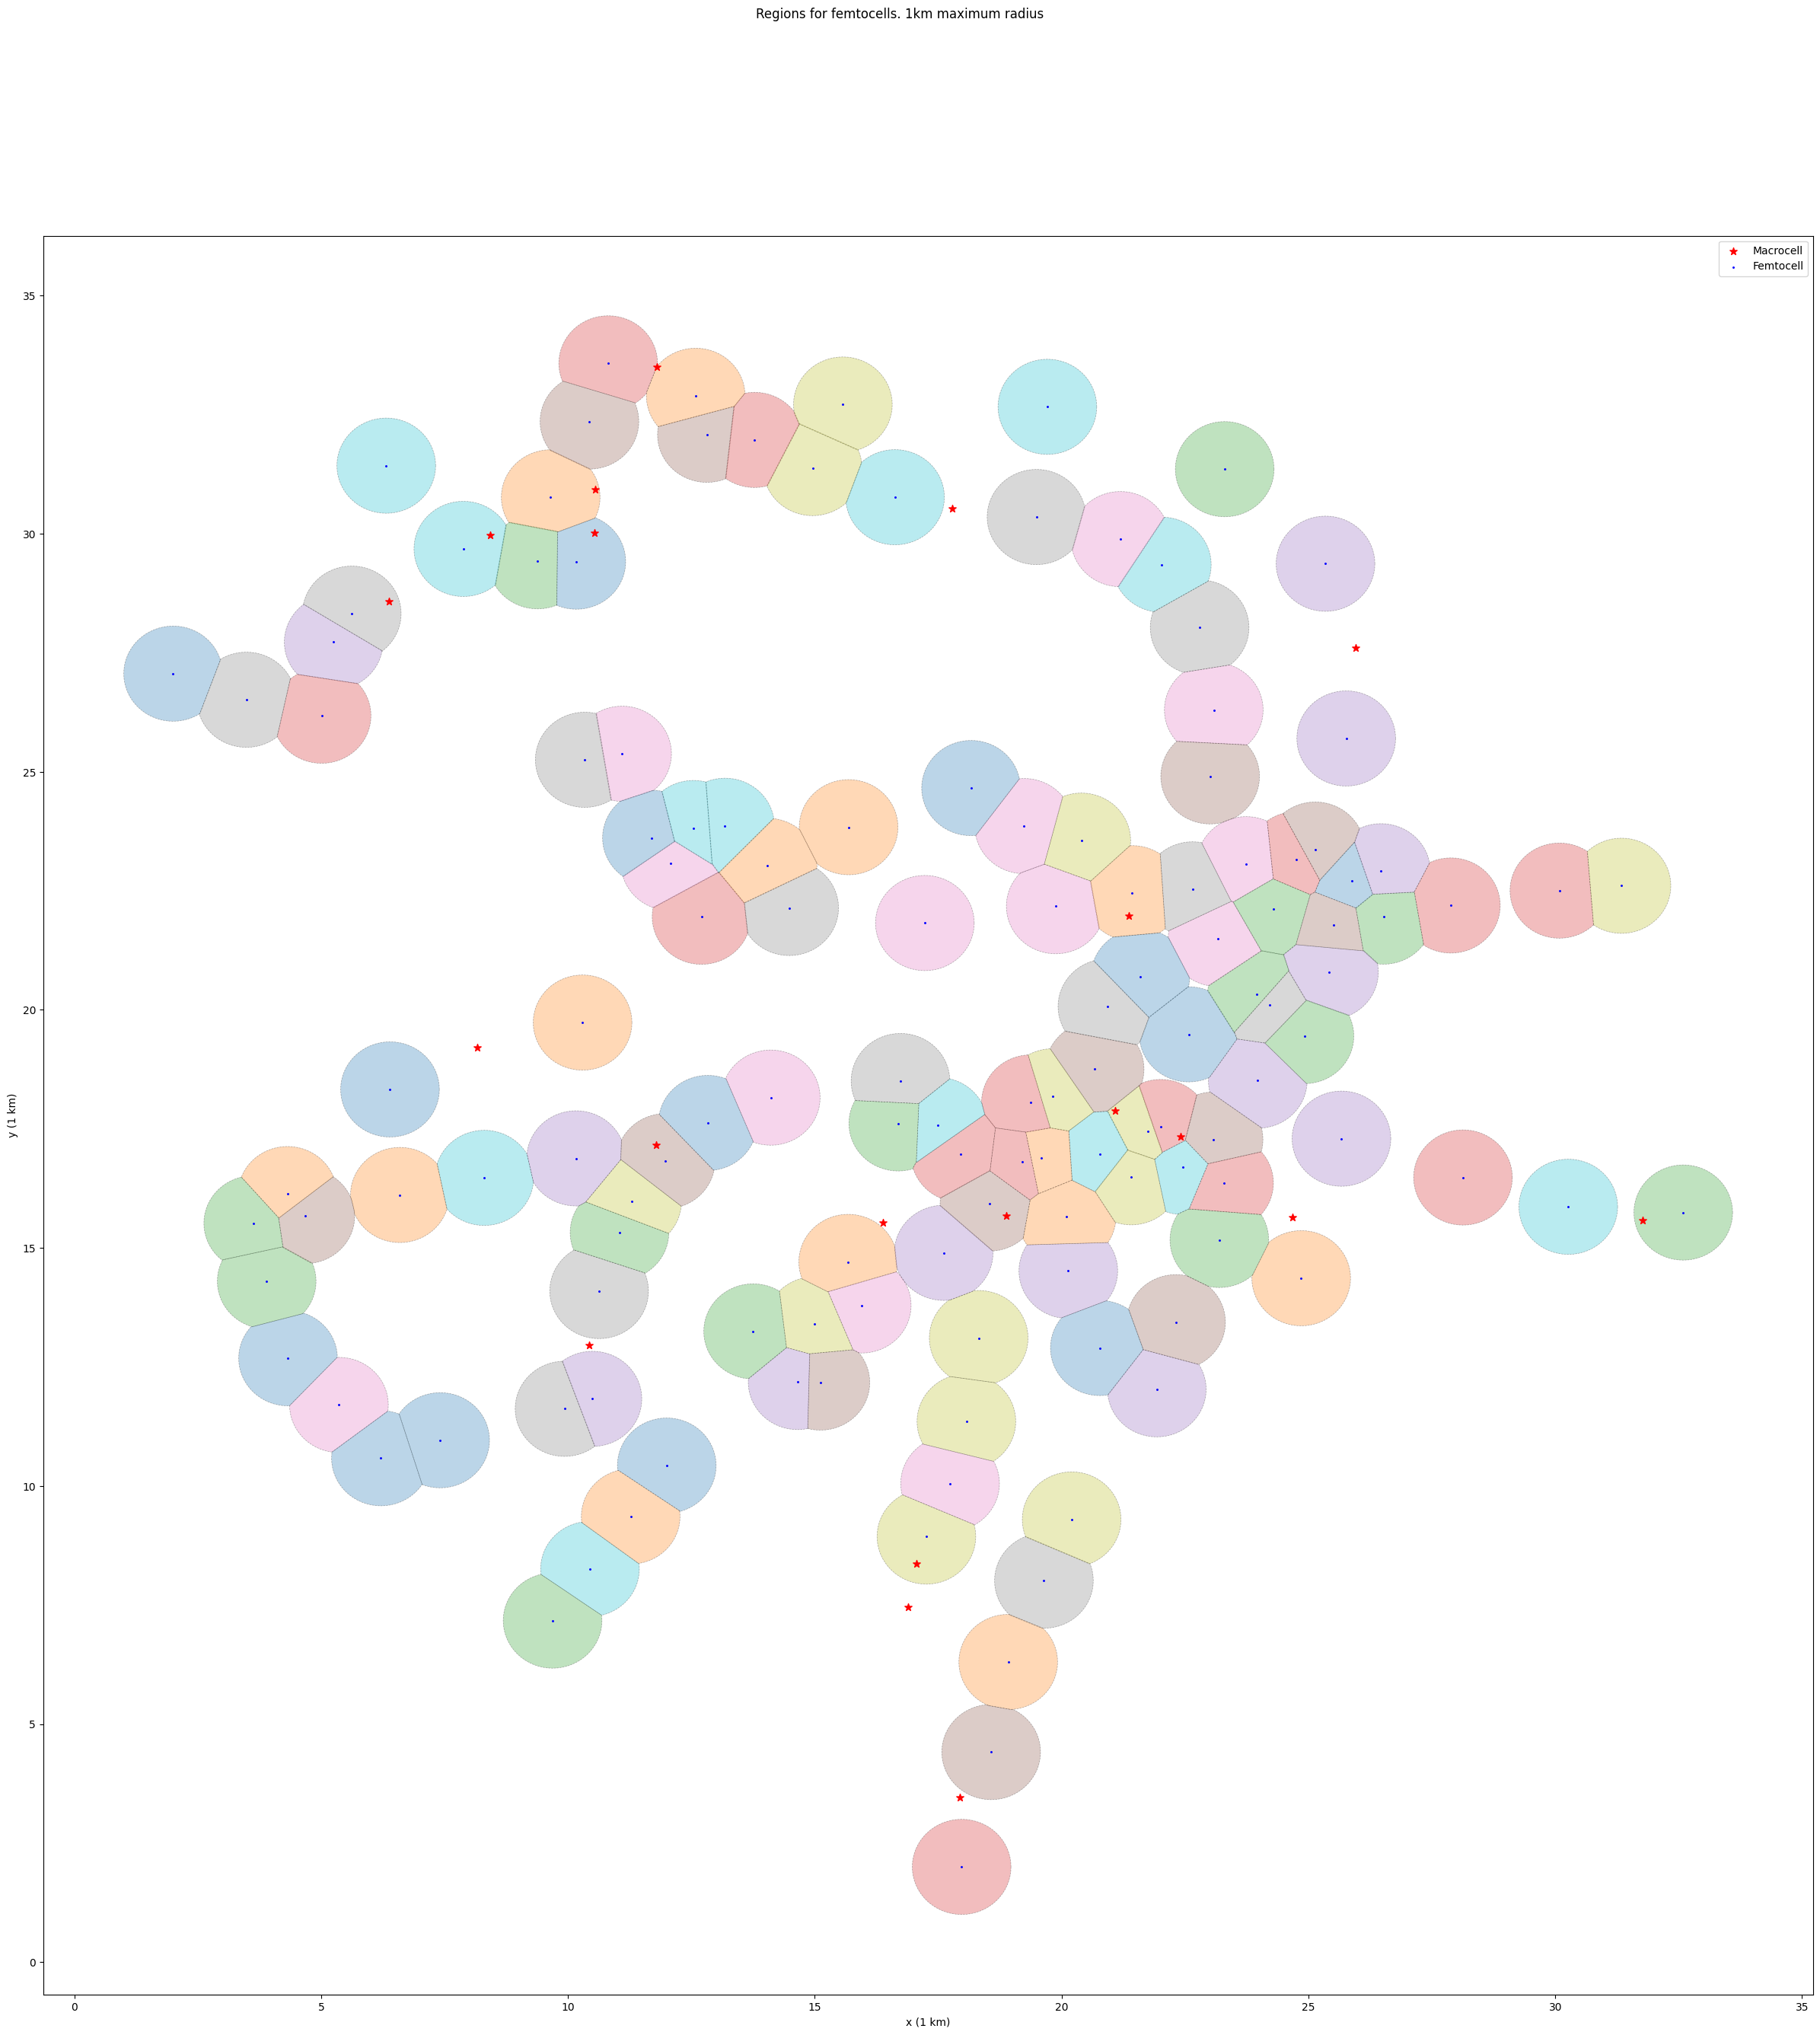

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: xlabel='x (1 km)', ylabel='y (1 km)'>)

In [9]:
standard_plot(
    regions, 
    graph.nodes, 
    scaling_factor, 
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for femtocells. 1km maximum radius", "figsize": (30, 30)},
)

In [26]:
total_overlap = 0

for i, region in regions.items():
    for j, region2 in regions.items():
        if i > j:
            try:
                overlap_area = region.intersection(region2).area
                print(f'Overlap {i}-{j}: {overlap_area}')
                total_overlap += overlap_area
            except Exception:
                pass
            
total_overlap

/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


Overlap 133-132: 0.0
Overlap 133-131: 0.0
Overlap 133-130: 0.0
Overlap 133-129: 0.0
Overlap 133-128: 0.0
Overlap 133-127: 0.0
Overlap 133-126: 0.0
Overlap 133-125: 0.0
Overlap 133-124: 0.0
Overlap 133-123: 0.0
Overlap 133-122: 0.0
Overlap 133-121: 0.0
Overlap 133-120: 0.0
Overlap 133-119: 0.0
Overlap 133-118: 0.0
Overlap 133-117: 0.0
Overlap 133-116: 0.0
Overlap 133-115: 0.0
Overlap 133-114: 0.0
Overlap 133-113: 0.0
Overlap 133-112: 0.0
Overlap 133-111: 0.0
Overlap 133-110: 0.0
Overlap 133-109: 0.0
Overlap 133-108: 0.0
Overlap 133-107: 0.0
Overlap 133-106: 0.0
Overlap 133-105: 0.0
Overlap 133-104: 0.0
Overlap 133-103: 0.0
Overlap 133-102: 0.0
Overlap 133-101: 0.0
Overlap 133-100: 0.0
Overlap 133-99: 0.0
Overlap 133-98: 0.0
Overlap 133-97: 0.0
Overlap 133-96: 0.0
Overlap 133-95: 0.0
Overlap 133-94: 0.0
Overlap 133-93: 0.0
Overlap 133-92: 0.0
Overlap 133-91: 0.0
Overlap 133-90: 0.0
Overlap 133-89: 0.0
Overlap 133-88: 0.0
Overlap 133-87: 0.0
Overlap 133-86: 0.0
Overlap 133-85: 0.0
Overlap

0.7748757638135187